## WeRateDogs data wrangle

In [1]:
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import json
import matplotlib.pyplot as plt
% matplotlib inline

# Gother

In [2]:
#read data from csv file 'twitter-archive-enhanced.csv'
archive_df = pd.read_csv('twitter-archive-enhanced.csv')


In [3]:
#exetract file_name from url
url ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
response = requests.get(url)


In [4]:
#creat image-predictions.tsv on my notebook
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)     


In [5]:
#creat data frame  from  'image-predictions.tsv' file
Image_predictions_df = pd.read_csv(file_name, header=None, delim_whitespace=True)


In [6]:
#exetract json file_name from url because i dont have tweeter account
url ='https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt'
file_name_json = url.split('/')[-1]
response_1 = requests.get(url)
#load json tweet data in 'tweet-json.txt'
if not os.path.isfile(file_name_json):
    with open(file_name_json, 'wb') as f:
        f.write(response_1.content)     

In [7]:

df_list = []

with open(file_name_json, 'r') as file:
    for line in file:
        tweet = json.loads(line)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count})
 #load json tweet data in data frame      
json_df = pd.DataFrame(df_list)

   

# assess

# visual assessing:

In [8]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [9]:
Image_predictions_df

,0,1,2,3,4,5,6,7,8,9,10,11
0,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.0614285,True
2,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.07419169999999999,True,Rhodesian_ridgeback,0.07201,True
3,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.13858399999999998,True,bloodhound,0.11619700000000001,True
4,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
5,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
6,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.0161992,True
7,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.9330120000000001,False,mud_turtle,0.04588540000000001,False,terrapin,0.017885299999999996,False
8,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279399999999995,True,fur_coat,0.0544486,False
9,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014593799999999999,False,golden_retriever,0.00795896,True


In [10]:
json_df

,favorite_count,retweet_count,tweet_id
0,39467,8853,892420643555336193
1,33819,6514,892177421306343426
2,25461,4328,891815181378084864
3,42908,8964,891689557279858688
4,41048,9774,891327558926688256
5,20562,3261,891087950875897856
6,12041,2158,890971913173991426
7,56848,16716,890729181411237888
8,28226,4429,890609185150312448
9,32467,7711,890240255349198849


# programatice assess:

In [11]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
Image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
0     2076 non-null object
1     2076 non-null object
2     2076 non-null object
3     2076 non-null object
4     2076 non-null object
5     2076 non-null object
6     2076 non-null object
7     2076 non-null object
8     2076 non-null object
9     2076 non-null object
10    2076 non-null object
11    2076 non-null object
dtypes: object(12)
memory usage: 194.7+ KB


In [13]:
json_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
tweet_id          2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [14]:
sum(archive_df.tweet_id.isnull())


0

In [15]:
sum(archive_df.expanded_urls.isnull())

59

In [16]:
json_df.head

<bound method NDFrame.head of       favorite_count  retweet_count            tweet_id
0              39467           8853  892420643555336193
1              33819           6514  892177421306343426
2              25461           4328  891815181378084864
3              42908           8964  891689557279858688
4              41048           9774  891327558926688256
5              20562           3261  891087950875897856
6              12041           2158  890971913173991426
7              56848          16716  890729181411237888
8              28226           4429  890609185150312448
9              32467           7711  890240255349198849
10             31166           7624  890006608113172480
11             28268           5156  889880896479866881
12             38818           8538  889665388333682689
13             27672           4735  889638837579907072
14             15359           2321  889531135344209921
15             25652           5637  889278841981685760
16             296

# cleaning:

In [17]:
# CREATE A COPY FROM THE 3 DATA FRAME TO DO THE CLEANING PROCESS
archive_clean_df = archive_df.copy()
Image_predictions_clean_df = Image_predictions_df.copy()
json_clean_df =json_df.copy()

Define: 


convert  the data type of tweet_id columns from int to string in archive_clean_df 


code:

In [18]:
archive_clean_df.tweet_id  = archive_clean_df.tweet_id.astype(str)

test:

In [19]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

define:

convert  the data type of " timestamp  " columns from string  to datetime.

code:

In [20]:
archive_clean_df.timestamp  = pd.to_datetime(archive_clean_df.timestamp)

test:

In [21]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime64[ns](

define

renaming the columns in Image_predictions_clean_df

code

In [22]:
cols = ['tweet_id', 'jpg_url', 'img_num', 
       'prediction_1', 'confidence_1', 'breed_1',
       'prediction_2', 'confidence_2', 'breed_2',
       'prediction_3', 'confidence_3', 'breed_3']
Image_predictions_clean_df.columns = cols


test:

In [23]:
Image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2076 entries, 0 to 2075
Data columns (total 12 columns):
tweet_id        2076 non-null object
jpg_url         2076 non-null object
img_num         2076 non-null object
prediction_1    2076 non-null object
confidence_1    2076 non-null object
breed_1         2076 non-null object
prediction_2    2076 non-null object
confidence_2    2076 non-null object
breed_2         2076 non-null object
prediction_3    2076 non-null object
confidence_3    2076 non-null object
breed_3         2076 non-null object
dtypes: object(12)
memory usage: 194.7+ KB


define

Delete the tweets  in archive_clean_df  which has no image

code

In [24]:
tweets_has_image = list(Image_predictions_clean_df.tweet_id.unique())


In [25]:
archive_clean_df = archive_clean_df[archive_clean_df.tweet_id.isin(tweets_has_image)]

test

In [26]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2075 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2075 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2075 non-null datetime64[ns]
source                        2075 non-null object
text                          2075 non-null object
retweeted_status_id           81 non-null float64
retweeted_status_user_id      81 non-null float64
retweeted_status_timestamp    81 non-null object
expanded_urls                 2075 non-null object
rating_numerator              2075 non-null int64
rating_denominator            2075 non-null int64
name                          2075 non-null object
doggo                         2075 non-null object
floofer                       2075 non-null object
pupper                        2075 non-null object
puppo                         2075 non-null object
dtypes: datetime64[ns](1),

define

Delete the retweets  from archive_clean_df  

code

In [27]:
retweet_entries = archive_clean_df.retweeted_status_id.notnull()

In [28]:
archive_clean_df = archive_clean_df[~retweet_entries]

test

In [29]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1994 non-null object
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null datetime64[ns]
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1994 non-null object
doggo                         1994 non-null object
floofer                       1994 non-null object
pupper                        1994 non-null object
puppo                         1994 non-null object
dtypes: datetime64[ns](1), fl

define

Delete the in_replay   tweets  from archive_clean_df  

code

In [30]:
in_replay_entries = archive_clean_df. in_reply_to_status_id.notnull()

In [31]:
archive_clean_df = archive_clean_df[~in_replay_entries]

test

In [32]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      1971 non-null object
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     1971 non-null datetime64[ns]
source                        1971 non-null object
text                          1971 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1971 non-null object
rating_numerator              1971 non-null int64
rating_denominator            1971 non-null int64
name                          1971 non-null object
doggo                         1971 non-null object
floofer                       1971 non-null object
pupper                        1971 non-null object
puppo                         1971 non-null object
dtypes: datetime64[ns](1), floa

define

Drop 5 columns (retweeted_status_id, retweeted_status_user_id, in_reply_to_status_id, in_reply_to_status_user_id, retweeted_status_timestamp')  from   archive_clean_df



code

In [33]:
archive_clean_df.drop(['retweeted_status_id', 'retweeted_status_user_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_timestamp'],axis =1 , inplace =True)

test

In [34]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 200.2+ KB


define

Delete the tweets  in Image_predictions_clean_df which  not in archive_clean_df  

code

In [35]:
tweets_archive = list(archive_clean_df.tweet_id.unique())

In [36]:
Image_predictions_clean_df = Image_predictions_clean_df[Image_predictions_clean_df.tweet_id.isin(tweets_archive )]

test

In [37]:
Image_predictions_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 1 to 2075
Data columns (total 12 columns):
tweet_id        1971 non-null object
jpg_url         1971 non-null object
img_num         1971 non-null object
prediction_1    1971 non-null object
confidence_1    1971 non-null object
breed_1         1971 non-null object
prediction_2    1971 non-null object
confidence_2    1971 non-null object
breed_2         1971 non-null object
prediction_3    1971 non-null object
confidence_3    1971 non-null object
breed_3         1971 non-null object
dtypes: object(12)
memory usage: 200.2+ KB


define

collect the dog clacification from 4 columns to one column  called “dog _classification” after  replacing none value  in four columns 

code

In [38]:
# delete the 'none' value in 4 columns 
archive_clean_df.iloc[:, -4:  ] = archive_clean_df.iloc[:, -4: ].replace('None','')  

In [39]:
# collect the value from 4 columns in one columns called dog_classification
archive_clean_df ['dog_classification'] = archive_clean_df ['doggo'] + archive_clean_df ['puppo'] + archive_clean_df ['floofer'] + archive_clean_df ['pupper']

test

In [40]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
doggo                 1971 non-null object
floofer               1971 non-null object
pupper                1971 non-null object
puppo                 1971 non-null object
dog_classification    1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(10)
memory usage: 215.6+ KB


In [41]:
archive_clean_df['dog_classification'].value_counts()

                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggofloofer       1
doggopuppo         1
Name: dog_classification, dtype: int64

define

repair the dog_ classification (doggopuppo-doggopuppo-doggofloofer )

code

In [42]:
archive_clean_df.loc[archive_clean_df['dog_classification'] == 'doggopupper', 'dog_classification'] = 'doggo-pupper'
archive_clean_df.loc[archive_clean_df['dog_classification'] == 'doggopuppo', 'dog_classification'] = 'doggo-puppo'
archive_clean_df.loc[archive_clean_df['dog_classification'] == 'doggofloofer', 'dog_classification'] = 'doggo-floofer'


test

In [43]:
archive_clean_df['dog_classification'].value_counts()

                 1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_classification, dtype: int64

In [44]:
archive_clean_df.sample

<bound method NDFrame.sample of                 tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    88

define

drop the four columns(doggo,floofer,pupper,puppo)

code

In [45]:
archive_clean_df.drop(['doggo', 'floofer', 'pupper', 'puppo'],axis =1 , inplace =True)

test

In [46]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_classification    1971 non-null object
dtypes: datetime64[ns](1), int64(2), object(6)
memory usage: 154.0+ KB


define

fixing lowercase names in "name" column archive_clean_df
coding:


code

In [47]:
archive_clean_df ["name"] = archive_clean_df ["name"].str.title()

test

In [48]:
archive_clean_df.sample

<bound method NDFrame.sample of                 tweet_id           timestamp  \
0     892420643555336193 2017-08-01 16:23:56   
1     892177421306343426 2017-08-01 00:17:27   
2     891815181378084864 2017-07-31 00:18:03   
3     891689557279858688 2017-07-30 15:58:51   
4     891327558926688256 2017-07-29 16:00:24   
5     891087950875897856 2017-07-29 00:08:17   
6     890971913173991426 2017-07-28 16:27:12   
7     890729181411237888 2017-07-28 00:22:40   
8     890609185150312448 2017-07-27 16:25:51   
9     890240255349198849 2017-07-26 15:59:51   
10    890006608113172480 2017-07-26 00:31:25   
11    889880896479866881 2017-07-25 16:11:53   
12    889665388333682689 2017-07-25 01:55:32   
13    889638837579907072 2017-07-25 00:10:02   
14    889531135344209921 2017-07-24 17:02:04   
15    889278841981685760 2017-07-24 00:19:32   
16    888917238123831296 2017-07-23 00:22:39   
17    888804989199671297 2017-07-22 16:56:37   
18    888554962724278272 2017-07-22 00:23:06   
20    88

define

repair the 'rating_Denominator' colunm values to equil 10

code

In [49]:
archive_clean_df.loc[archive_clean_df['rating_denominator'] != 10, 'rating_denominator'] = 10

test

In [50]:
archive_clean_df['rating_denominator'].value_counts()

10    1971
Name: rating_denominator, dtype: int64

define

Adjust   the tweet_id  in  json_clean_df   to has only the  tweet_id   in  archive_clean_df

code

In [51]:
json_clean_df = json_clean_df[json_clean_df.tweet_id.isin(tweets_archive )]

test

In [52]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    1971 non-null int64
retweet_count     1971 non-null int64
tweet_id          1971 non-null int64
dtypes: int64(3)
memory usage: 61.6 KB


define

convert  the data type of tweet_id columns from int to string in json_clean_df 

code

In [53]:
json_clean_df.tweet_id  = json_clean_df.tweet_id.astype(str)

test

In [54]:
json_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2353
Data columns (total 3 columns):
favorite_count    1971 non-null int64
retweet_count     1971 non-null int64
tweet_id          1971 non-null object
dtypes: int64(2), object(1)
memory usage: 61.6+ KB


define

merg    json_clean_df   with archive_clean_df    to  join  retweet_count , favorite_count  to  the rest information to the same observation

code

In [55]:
master_archive_data_df =pd.merge(archive_clean_df, json_clean_df, left_on='tweet_id', right_on='tweet_id')

test

In [56]:
master_archive_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_classification    1971 non-null object
favorite_count        1971 non-null int64
retweet_count         1971 non-null int64
dtypes: datetime64[ns](1), int64(4), object(6)
memory usage: 184.8+ KB


# store

In [57]:
# store master_archive_data_df  in 'twitter_archive_master.csv'
file_name = 'twitter_archive_master.csv'
if not os.path.isfile(file_name):
   master_archive_data_df.to_csv(file_name, index=False)

In [58]:
# store Image_predictions_clean_df  in 'image_predictions_master.csv'
file_name = 'image_predictions_master.csv'
if not os.path.isfile(file_name):
   Image_predictions_clean_df.to_csv(file_name, index=False)

# Analyze

In [59]:
#get the count of the tweets for each dog_ classification
master_archive_data_df['dog_classification'].value_counts()


                 1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_classification, dtype: int64

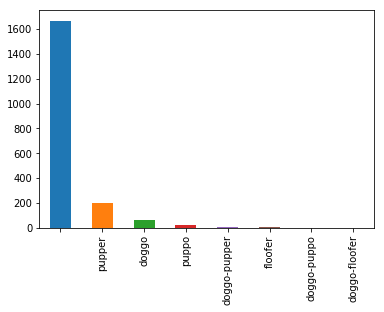

In [60]:
#plot a bar chart for count of the tweets for each dog_ classification
master_archive_data_df['dog_classification'].value_counts().plot(kind='bar')



#plot a time seirse for the mean of 'rating_numerator' column:

In [61]:
# Make an extra copy of the data
df_time = master_archive_data_df.copy()

In [62]:
#Set the time stamp column as the index of the dataframe
df_time.index = df_time['timestamp']

In [63]:
#Drop the column that is now used as an index
df_time.drop(['timestamp'], axis = 1, inplace=True)

In [64]:
#Sort the index
df_time.sort_index(inplace=True)

In [65]:
#Group by the time frame
rating_numerator_mean = df_time.groupby([(df_time.index.year),(df_time.index.month)]).rating_numerator.mean()


([<matplotlib.axis.XTick at 0x7fdcd1612c18>,
 <a list of 6 Text xticklabel objects>)

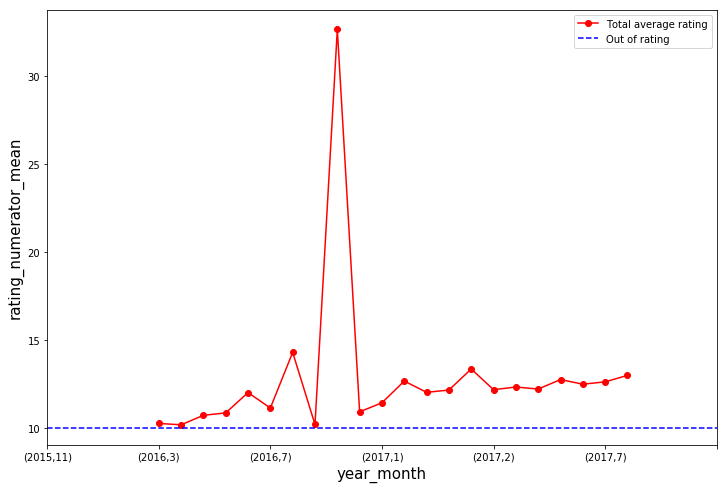

In [66]:
#plot the data
rating_numerator_mean.plot(style='-ro', figsize=(12,8),label='Total average rating')

plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.ylabel('rating_numerator_mean' , fontsize =15)
plt.xlabel('year_month' , fontsize =15)
plt.legend()
locs,label = plt.xticks()
plt.xticks(locs ,['(2015,11)' , '(2016,3)' , '(2016,7)' , '(2017,1)' , '(2017,2)',
           '(2017,7)'])

# deal with outliers in rating_numerator to get correct values for mean of rating_numerator
#I will plot the diagram for rating_numerator values < 15 only

In [67]:
# Make an extra copy of the data
df_time_in_range = master_archive_data_df.copy()

In [68]:
# keep the rows which have rating_numerator values < 15 only
df_time_in_range = df_time_in_range[df_time_in_range.rating_numerator < 15]

In [69]:
#Set the time stamp column as the index of the dataframe
df_time_in_range.index = df_time_in_range['timestamp']

In [70]:
#Drop the column that is now used as an index
df_time_in_range.drop(['timestamp'], axis = 1, inplace=True)

In [71]:
#Sort the index
df_time_in_range.sort_index(inplace=True)

In [72]:
#Group by the time frame
rating_numerator_mean = df_time_in_range.groupby([(df_time_in_range.index.year),(df_time_in_range.index.month)]).rating_numerator.mean()


([<matplotlib.axis.XTick at 0x7fdcd1588630>,
 <a list of 6 Text xticklabel objects>)

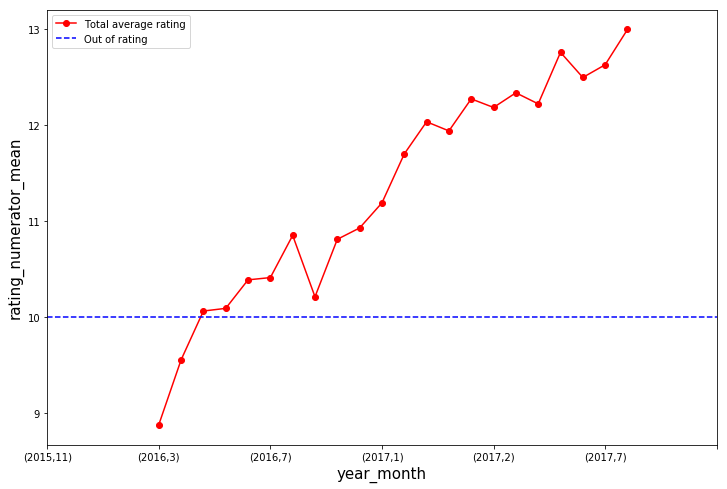

In [73]:
#plot the data
rating_numerator_mean.plot(style='-ro', figsize=(12,8),label='Total average rating')

plt.axhline(y=10.0, color='b', linestyle='--', label='Out of rating')
plt.ylabel('rating_numerator_mean' , fontsize =15)
plt.xlabel('year_month' , fontsize =15)
plt.legend()
locs,label = plt.xticks()
plt.xticks(locs ,['(2015,11)' , '(2016,3)' , '(2016,7)' , '(2017,1)' , '(2017,2)',
           '(2017,7)'])

#analysis  the interaction from followers to each dog_classification's posts 

In [74]:
# get the average retweet count for each dog_classification 
avg_retweet_count_dog_classification = master_archive_data_df.groupby('dog_classification').retweet_count.mean()

#the index with stand for the x axis in plotting 
avg_retweet_count_dog_classification.index
# get the average favorite count for each dog_classification  .
avg_favorite_count_dog_classification = master_archive_data_df.groupby('dog_classification').favorite_count.mean()  
#the index with stand for the x axis in plotting
avg_favorite_count_dog_classification.index

Index(['', 'doggo', 'doggo-floofer', 'doggo-pupper', 'doggo-puppo', 'floofer',
       'pupper', 'puppo'],
      dtype='object', name='dog_classification')

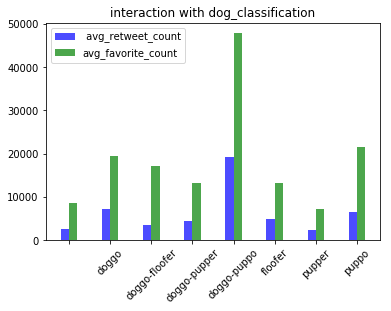

In [75]:
width = 0.2
ind = np.arange(len(avg_retweet_count_dog_classification))

# plot retweet_bars,favorite_bars
retweet_bars = plt.bar(ind, avg_retweet_count_dog_classification, width, color='b', alpha=.7, label=' avg_retweet_count')
favorite_bars = plt.bar(ind + width, avg_favorite_count_dog_classification, width, color='g', alpha=.7, label='avg_favorite_count')

# title and labels
plt.ylabel('')
plt.xlabel('')
plt.title('interaction with dog_classification')
locations = ind + width / 2  # xtick locations
avg_retweet_count_dog_classification.index
labels = avg_retweet_count_dog_classification.index 
# xtick labels
plt.xticks(locations, labels , rotation=45)

# legend
plt.legend()